#  <center> <h1><span style="color:blue"> SEMINARIO DE NINJA-PYTHONISTAS</span></h1> </center>

## TEMAS:
## * Un problema de clasificación
## * Método k-nearest neighbors
### > Excel en la ciencia de datos
### > Qué entre el Panda



# La base de datos "Iris flower data set"



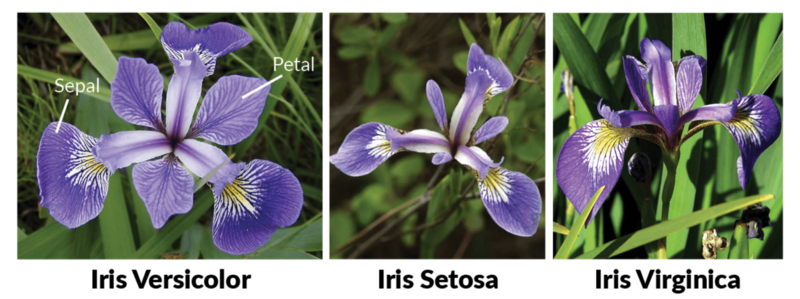

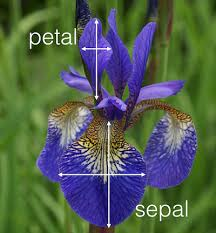

Historia de la BD.
https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# El método K-Nearest Neighbors
K-Nearest Neighbors (KNN) es un método de clasificación supervisado. La idea: tomar las características conocidas sobre un dato y compararlas con un conjunto de datos de entrenamiento y determinar cuáles son los k datos mas similares. En base a esto y a un modelo matemático clasificar el dato.

## Ejemplo:
<center> <img src="https://github.com/garestrear/ninja-pythonist/blob/master/knn/KNN-Classification.gif?raw=1" width="650" height="250" align="middle"/> </center>

## ¿cómo escojo la k?
<center> <img src="https://github.com/garestrear/ninja-pythonist/blob/master/knn/Value-of-K.gif?raw=1" width="650" height="250" align="middle"/> </center>

Gráficos tomados de: https://machinelearningknowledge.ai/k-nearest-neighbor-classification-simple-explanation-beginners/. Recuperado: 9/10/2020

# EXCEL PARA CIENCIA DE DATOS ;-)

# FÓRMULA MATRIZ DE DISTANCIAS
'''=RAIZ((BUSCARV(Distance_Table[@[Test ID]:[Test ID]];test!$A$2:$F$46;2)-BUSCARV(VALOR.NUMERO(Distance_Table[[#Encabezados];[2]]);'training set'!$A$2:$F$104;2))^2+(BUSCARV(Distance_Table[@[Test ID]:[Test ID]];test!$A$2:$F$46;3)-BUSCARV(VALOR.NUMERO(Distance_Table[[#Encabezados];[2]]);'training set'!$A$2:$F$104;3))^2+(BUSCARV(Distance_Table[@[Test ID]:[Test ID]];test!$A$2:$F$46;4)-BUSCARV(VALOR.NUMERO(Distance_Table[[#Encabezados];[2]]);'training set'!$A$2:$F$104;4))^2+(BUSCARV(Distance_Table[@[Test ID]:[Test ID]];test!$A$2:$F$46;5)-BUSCARV(VALOR.NUMERO(Distance_Table[[#Encabezados];[2]]);'training set'!$A$2:$F$104;5))^2)'''



# k-ésimo menores
INDICE(Distance_Table[#Encabezados], COINCIDIR(K.ESIMO.MENOR(Distance!$B2:$DB2, 1), Distance!2:2; FALSO))

=BUSCARV(VALOR.NUMERO(INDICE(Distance_Table[#Encabezados]; COINCIDIR(K.ESIMO.MENOR(Distance!$B2:$DB2; 1); Distance!2:2; FALSO)));'training set'!$A$1:$F$106;6;FALSO)

Qué entre el Panda
Primero hacemos imports de librerías que utilizaremos para manejo de datos, gráficas y nuestro algoritmo.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Cargamos el archivo entrada csv con pandas, usando separador de punto y coma, pues en las reviews hay textos que usan coma. Con head(10) vemos los 10 primeros registros.

In [ ]:
## FORMA INCORRECTA
filename ='https://github.com/garestrear/ninja-pythonist/blob/master/knn/reviews_sentiment.csv'
dataframe2 = pd.read_csv(filename,sep=';')
dataframe2.head(10)
# ▰︶︹︺▰

<centering>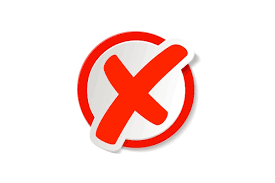 <centering>

In [78]:
# FORMA CORRECTA
url='https://raw.githubusercontent.com/garestrear/ninja-pythonist/master/knn/reviews_sentiment.csv'
dataframe = pd.read_csv(url, sep=";")
dataframe.head(10)
# ヽ(•‿•)ノ

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [73]:
# Exploración de los datos
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


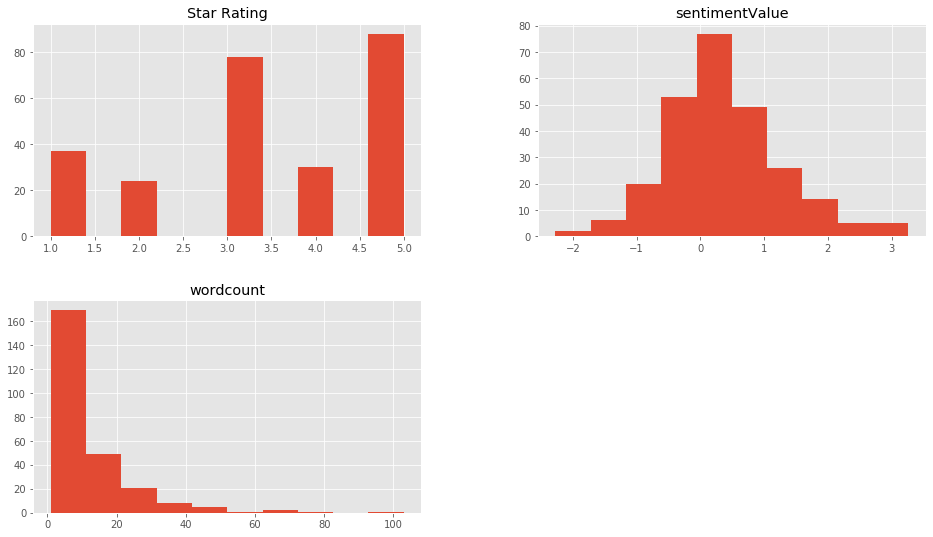

In [79]:
# Algunos gráficos
dataframe.hist()
plt.show()

In [80]:
# frecuencias
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


In [101]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X.size,X_test.size,X_train.size,y_train.size,y_test.size)

514 130 384 192 65


# Usemos k-Nearest Neighbor con Scikit Learn

In [102]:
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


# Precisión del modelo

Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos:m

In [103]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

   

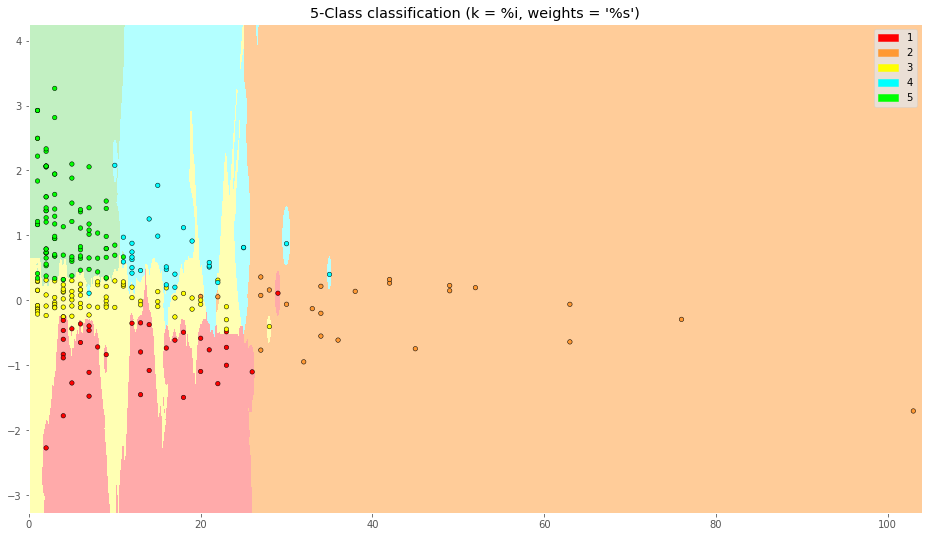

In [106]:

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i, weights = '%s')")
            #  % (n_neighbors, weights))
 
plt.show()

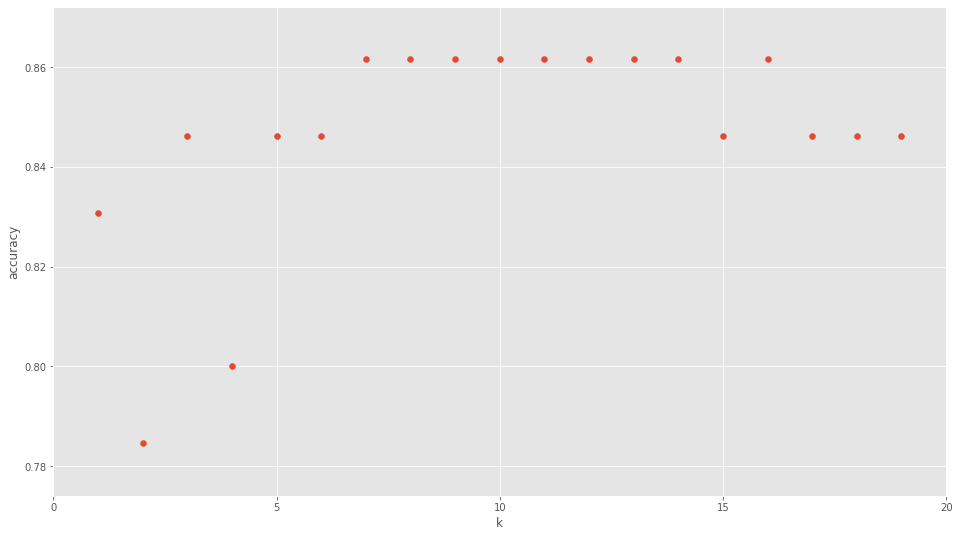

In [108]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

Ya tenemos nuestro modelo y nuestro valor de k. Ahora, lo lógico será usarlo! Pues supongamos que nos llegan nuevas reviews! veamos como predecir sus estrellas de 2 maneras. La primera:

In [109]:
print(clf.predict([[5, 1.0]]))

[5]


Pero también podríamos obtener las probabilidades que de nos den 1, 2,3,4 o 5 estrellas con predict_proba():

In [110]:

print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]
